<a href="https://colab.research.google.com/github/sunhuanhuan920/ECE1513/blob/main/ECE1513_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Part A**

`i`. In supervised learning, labeled data is used during training process to learn mapping between inputs (features) to outputs (labels). Once trained, the model can predict label on unseen data. On contrast, no labels are provided for unsupervised learning model. Thus, instead of learning mapping between inputs and outputs, it seeks to discover underlying patterns in the data, from which we can gain a more in-depth understanding or insight about the data. In self-supervised learning, labels are derived from the input data itself instead of being provided externally. For example, we can pretend there is a part of input data that we don't know and we train the model to predict that part of the input data from any other part using the pretended unknown part of the data as label.

\
`ii`. Data splitting is essential to evaluate the performance of a model on unseen data. By training on one subset of data and testing on another, we can assess how well the trained model performs on unseen data, as our goal is to have a model that can generalize well.

\
`iii`. Cross validation divides the dataset into multiple subsets, and iteratively train and validate the model on these subsets. For example, train on one subset and validate the performance of the trained model on other subsets, then train on a different subset and validate on the remaining ones, so on and so forth. This provides multiple evaluation of the model's performance across different portions of data, resulting in a more comprehensive performance evaluation on the model, as compared to train-test split where only a single evaluation is performed.

\
`iv`. Confusion matrix is a way of measuring the performance of classification models. It demonstrates the performance of a classification model based on the true outputs and the predicted outputs. It has the following format

|                   |   Actual Positive  |   Actual Negative   |
|-------------------|--------------------|---------------------|
| Predicted Positive| True Positive (TP) | False Positive (FP) |
| Predicted Negative| False Negative (FN)| True Negative (TN)  |

By using confusion matrix, we can know the correct and incorrect classifications made by the classification model, from which we can derive different perfromance metrics.

\
`v`. Accuracy is defined as
\begin{equation}
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}.
\end{equation}
It measures the percentage of predictions that are correct.

Sensitivity is defined as
\begin{equation}
Sensitivity = \frac{TP}{TP + FN}.
\end{equation}
It measures the percentage of positive cases that were correctly identified by the classifier.

Specificity is defined as
\begin{equation}
Specificity = \frac{TN}{TN + FP}
\end{equation}
It measures the percentage of negatives cases that were correctly identified by the classifier.

\
`vi`. Underfitting happens when a trained model fails to capture the general trend or pattern in the data, resulting in a oversimplified model that performs poorly on both training data and testing data. Overfitting, on the other hand, happens when a trained model captures too much information in the input data, including uncessary information such as noise. As a reulst, it fits too well to the input data and therefore cannot generalize well on data other than training data. Overfitted model will perform exceptionally well on the training data but poorly on the test data.

\
`vii`. Balanced dataset has roughly the same number of data samples for each class. Whereas, unbalanced dataset contain data such that one or more classess may contain significantly more samples than the other classes. Using unbalanced dataset for training may result in bias classification that favors the class that contains more data samples.

\
`viii`. Both normalization and standardization are used for data preprocessing in machine learning. Normalization scales the data so that its value fall within the range $[0, 1]$. It can be used when the model is sensitive to the magnitude of the input data or we want inputs to have uniform scales. On the other hand, standardization transforms a dataset to have a mean of 0 and a standard deviation of 1. It can be used when the model assumes data to be centered around zero. In addition, such transformation is less sensitive to the outliers in the data compared to normalization.

\
`ix`. Neural network is a kind of machine learning algorithm with structure that resembles the structure of biological neural network of human brain. It comprises layers of interconnected nodes, with each layer processing output of last layer through linear function with weights and biases, and non-linear activation function. Error backpropagation is used to iteratively adjust the values of weights and bias to minimize prediction errors. In essence, neural networks can be considered as linear basis function model, with basis function as a nonlinear function of a linear combination of the inputs, where weights and bias in the linear combination are adjustable.

\
`x`. Large language models are deep learning models that are trained to understand and generate human language, and perform general purpose text interaction with human. These models usually comprise more than billions of parameters and trained on vast amount of text data. Therefore, they require tremendous amount of computational resources for training and operation, and are able to exhibit remarkable linguistic prowess and store extensive knowledge once training is completed.



**Part B**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_and_split_data(filename):

    # Load the dataset
    df = pd.read_csv(filename)

    # Fill missing values with 0
    df = df.fillna(0)

    # Separte labels from dataset
    X = df.drop(columns=['Dataset'])
    y = df['Dataset']
    y = y.map({1: 1, 2: 0})

    # Extract feature names for future use
    feature_names = X.columns.tolist()

    # Convert gender feature to numeric value using a dictionary
    X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

    # Convert to numpy arrays
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

    return X_train, X_test, y_train, y_test, feature_names

# Dataset file path
dataset_filepath = '/content/drive/MyDrive/Colab Notebooks/ECE1513/indian_liver_patient.csv'

# Data splitting and extract feature names for future use
X_train, X_test, y_train, y_test, feature_names = load_and_split_data(dataset_filepath)

**Part C & D**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from IPython.display import display, Markdown
import joblib

# Initialize markdown string to display table
markdown_string = """
### Model Performance

| Model                   | Training Accuracy | Testing Accuracy |
|-------------------------|-------------------|------------------|
"""

# Create a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=21),
    'LDA': LinearDiscriminantAnalysis()
}

# Create a Dictionary to store trained models
trained_models = {}

# Initialize variables to track the best model and its test accuracy
best_accuracy = 0
best_model_name = ""
best_model = None

# Train and evaluate all listed classifiers
for name, clf in classifiers.items():
    # Training the classifier
    clf.fit(X_train, y_train)

    # Store the trained model
    trained_models[name] = clf

    # Making predictions on the training set
    y_train_pred = clf.predict(X_train)

    # Compute the training accuracy
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # Making predictions on the test set
    y_test_pred = clf.predict(X_test)

    # Compute the testing accuracy
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Check if the current model has the best accuracy
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model_name = name
        best_model = clf

    # Append the result to the markdown string
    markdown_string += f"| {name} | {accuracy_train:.4f} | {accuracy_test:.4f} |\n"

# Save the best model to a file
joblib.dump(best_model, f'/content/drive/MyDrive/Colab Notebooks/ECE1513/{best_model_name}_best_model.pkl')

# Display the markdown string as a table
display(Markdown(markdown_string))


### Model Performance

| Model                   | Training Accuracy | Testing Accuracy |
|-------------------------|-------------------|------------------|
| Logistic Regression | 0.6936 | 0.7714 |
| SVM | 0.6838 | 0.7829 |
| Decision Tree | 1.0000 | 0.6400 |
| LDA | 0.6936 | 0.7429 |


**Logistic Regression:** This model applies the logistic sigmoid function to a linear function of the input, estimating the probability that a given input belongs to a particular class. The coefficients of the linear function are determined by maximum likelihood estimation, with the goal of maximizing the likelihood of observing the given set of targets.

**Support Vector Machine:** This model finds the optimal hyperplane that best separates data points of different classes. It aims to maximize the margin, which is the distance between this hyperplane and the closest data points (support vectors) from each class.

**Decision Tree:** At each node of the decision tree model, a decision is made by comparing one of the input features' value to a threshold parameter, directing the data flow down the branches until a leaf node, which represents the classification result, is reached. The tree is constructed with the objective of minimizing the impurity in the leaf node, facilitating that each leaf node mainly contains data samples from a single class. Common methods used to assess impurity are the information entropy and the Gini index.

**Linear Discriminant Analysis:** This model separates classes in a dataset by maximize the distance between the means of different classes while minimizing the variance within each class, resulting in minimized class overlap in the transformed space.

**Performance Comparison:** SVM has the highest testing accuracy of 0.7829, closely followed by Logistic Regression with 0.7714. The LDA also performs reasonably well with a testing accuracy of 0.7429. The Decision Tree, despite achieving a perfect training accuracy of 1, has the lowest testing accuracy of 0.6400.

From the results, SVM appears to be the best performing models, given its highest testing accuracy. This indicates that it generalizes better on unseen data compared to other models. While both Logistic Regression and LDA generalize decently, they don't reach the performance of the SVM. This might indicate that the data is not linearly separable, and SVM with a non-linear kernel performs better in terms of capturing non-linear relationship. For Decision Tree model, the issue of overfitting is evident.


In [ ]:
print(classifiers['Decision Tree'].predict(X_test))


[1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1
 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1]


**Part E**

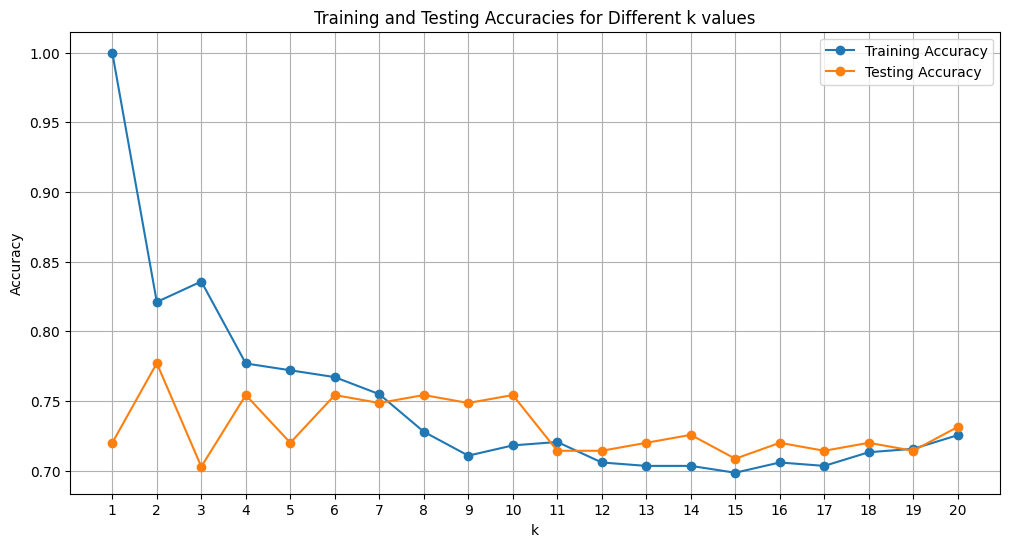

The optimal k value is 2 with testing accuracy of 0.7771


In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def select_knn_model(X_train, X_test, y_train, y_test):
    training_accuracies = []
    testing_accuracies = []
    k_values = list(range(1, 21))

    for k in k_values:
        # Initialize and train the KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Compute accuracies
        y_train_pred = knn.predict(X_train)
        training_accuracy = accuracy_score(y_train, y_train_pred)
        y_test_pred = knn.predict(X_test)
        testing_accuracy = accuracy_score(y_test, y_test_pred)

        training_accuracies.append(training_accuracy)
        testing_accuracies.append(testing_accuracy)

    # Plotting the accuracies
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, training_accuracies, label='Training Accuracy', marker='o')
    plt.plot(k_values, testing_accuracies, label='Testing Accuracy', marker='o')
    plt.title('Training and Testing Accuracies for Different k values')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Get the optimal k value
    optimal_k = k_values[testing_accuracies.index(max(testing_accuracies))]
    print(f"The optimal k value is {optimal_k} with testing accuracy of {max(testing_accuracies):.4f}")

    return optimal_k

optimal_k = select_knn_model(X_train, X_test, y_train, y_test)
# Train the KNN classifier using the optimal k and add it to trained_models dictionary
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
trained_models['KNN with optimal k'] = knn_optimal

We know that large values of k in KNN model can reduce the effect of noise, but make classification boundaries between classes blurred. On the other hand, small values of k may be more susceptible to noise, but can provide clearer and more accurate classification boundaries. In our unbalanced dataset where one class significantly outnumbers the other, a large k might favor the majority class, since a majority of the nearest neighbors might belong to the majority class. This can lead to less accurate predictions for the minority class. The optimal k value of 2 allows the model to make classification decision based on fewer samples nearby, which in turns allows the model to make predictions that are less influenced by the overwhelming presence of the majority class, drawing boundaries that might be overlooked with larger k values.

**Part F**

In Indian liver patient dataset, majority of the data samples belong to the liver patient class, while only a minority belongs to non-liver patient class. Thus, the dataset cannot be considered as a balanced dataset.

For image data, transformations, such as rotations, crops, brightness adjustments, and flips of the image, allow us to introduce minor variations to existing images and create additional data samples for the minority class. For text data, techniques like back-translation which translates a sentence from the original language to a target language and then translating it back to the original, and synonym replacement which involves substituting words in the text with their synonyms, introducing variability while retaining the overall meaning of the sentence, can enrich and balance the dataset. In addition, as discussed in **Part A** `viii`, standardization and normalization of data can also enhance the training performance for some machine learning model.

Confusion matrix and other techniques that utilize values, e.g., TP, FP, TN, FN, in the confusion matrix are particularly well-suited for evaluating models trained on imbalanced datasets. In imbalanced datasets, a model might produce extremely biased predition results, for example, predicting nearly everything as the majority class to achieve high testing accuracy. In such scenarios, testing accuracy alone can be misleading as it doesn't account for the misclassification of the minority class. However, a confusion matrix provides a more complete picture of where the model is making mistakes, making it easier to identify which class is being predicted more accurately and which isn't. This is crutial as we often want to know that the model doesn't just perform well overall, but is also sensitive and accurate in detecting the underrepresented class. In addition, the derived metrics from the confusion matrix, such as precision, recall, F1-score, can be calculated for both the majority and minority classes, providing us a more comprehensive understanding of the model's performance across all classes.

We can increase the number of samples in the minority class by replicating them or artificially generating synthetic samples using techniques like SMOTE (Synthetic Minority Over-sampling Technique). This process is called oversampling. Alternatively, we can reduce the number of samples in the majority class by randomly removing some of its samples. This process is called undersampling. By employing either oversampling or undersampling to balance the dataset, the resultant models can offer predictions with reduced bias, thereby improving their training performance.



**Part G**

In [ ]:
from sklearn.inspection import permutation_importance

# Dictionary to store the top 3 features for each classifier
top_features = {}

# Compute permutation importance for each classifier
for name, clf in trained_models.items():

    # Compute permutation importance
    result = permutation_importance(clf, X_train, y_train, n_repeats=50, random_state=21)

    # Extract the indices of the top 3 features
    top_indices = result.importances_mean.argsort()[-3:][::-1]

    # Get the names of the top 3 features using their indices
    top_feature_names = [feature_names[i] for i in top_indices]

    top_features[name] = list(zip(top_feature_names, top_indices))

    # print(f"Top 3 features for {name}: {list(zip(top_feature_names, top_indices))}")

display(Markdown("### Top 3 Important Features for Each Classifier:"))

# Create a dataframe to display top_features
df_top_features = pd.DataFrame(top_features)
df_top_features.columns = [f"{col} (Name, Index)" for col in df_top_features.columns]

# Display the dataframe
display(df_top_features)

### Top 3 Important Features for Each Classifier:

,"Logistic Regression (Name, Index)","SVM (Name, Index)","Decision Tree (Name, Index)","LDA (Name, Index)","KNN with optimal k (Name, Index)"
0,"(Albumin, 8)","(Albumin_and_Globulin_Ratio, 9)","(Total_Bilirubin, 2)","(Albumin, 8)","(Alkaline_Phosphotase, 4)"
1,"(Total_Protiens, 7)","(Albumin, 8)","(Alkaline_Phosphotase, 4)","(Total_Protiens, 7)","(Aspartate_Aminotransferase, 6)"
2,"(Age, 0)","(Total_Protiens, 7)","(Alamine_Aminotransferase, 5)","(Direct_Bilirubin, 3)","(Age, 0)"


Classifiers do not agree on which features are important. The reason behind this are mainly two-fold:
1. Different classifiers solve the classification problem differently, as they usually have different optimization objective. For instance, as discussed in **Part d**, a decision tree tends to make decisions based on single features at a time, minimizing the impurity in the leaf node. On the other hand, logistic regression determines feature importance based on the weight coefficient assigned to each feature after training. A feature with a higher absolute weight will be deemed more important. It tries to find weights that maximizes the likelihood of observing the observed data. Because of these different optimizing objectives, classifiers may prioritize features differently.

2. Some classifiers can capture non-linearities better than others. For instance, decision trees and SVM with non-linear kernels can capture non-linear decision boundaries, whereas Logistic Regression and LDA are linear models that primarily focus on linear relationships. Features that contribute non-linearly might be underrated by linear models but highly rated by non-linear models.